## Feature and Targets

- Tensors: matrix and class vector

- Input data matrices: $X$

$$X = \begin{bmatrix}
x_{11} & x_{12} & \cdots &x_{1D}\\
x_{21} & x_{22} & \cdots &x_{2D}\\
\vdots & \vdots & \ddots &\vdots\\
x_{K1} & x_{K2} & \cdots &x_{KD}
\end{bmatrix}$$

- class vector: $$Y = \begin{bmatrix}
y_1\\
\vdots\\
y_K
\end{bmatrix}$$


where $K$ is a number of samples and $D$ is a number of features and $y_i\in C = \{c_1, c_2, \ldots, c_n\}$ is $n$ class of targets.

## Linear Classifier

- weight:
$$w = \begin{bmatrix}
w_1\\
\vdots\\
w_D
\end{bmatrix}$$

- bias:
$$b = \begin{bmatrix}
b\\
\vdots\\
b
\end{bmatrix}_{D\times 1}$$


- decission function:
$$Z = Xw + b$$
- Threshold Function

    - logistic function
    
    $$\sigma(z) = \frac{1}{1 + e^{-z}}$$
    
- Prediction

$$\hat{Y} = \begin{bmatrix}
\hat{y}_1\\
\vdots\\
\hat{y}_K
\end{bmatrix} = \begin{bmatrix}
\sigma(wx_1 + b)\\
\vdots\\
\sigma(wx_K + b)
\end{bmatrix}$$

In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

In [2]:
z = torch.arange(-100, 100, 0.1).view(-1, 1)
sig = nn.Sigmoid()

In [3]:
yhat = sig(z)

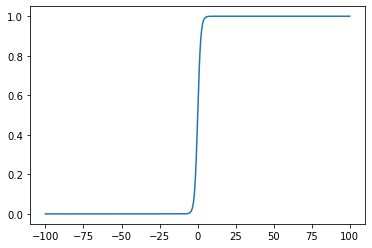

In [4]:
plt.plot(z.numpy(), yhat.numpy())
plt.show()

model: $z = wx_i + b \rightarrow \sigma(z) \rightarrow \hat{y}$

---
```python
model = nn.Sequential(nn.Linear(1, 1), nn.Sigmoid())
yhat = model(x)
```
---

In [5]:
class logistic_regression(nn.Module):
    def __init__(self, input_size):
        super(logistic_regression, self).__init__()
        self.linear = nn.Linear(input_size, 1)
        
    def forward(self, x):
        yhat = torch.sigmoid(self.linear(x))
        return yhat

In [6]:
model = logistic_regression(1)

In [7]:
print(list(model.parameters()))

[Parameter containing:
tensor([[0.2814]], requires_grad=True), Parameter containing:
tensor([0.5780], requires_grad=True)]


In [8]:
model_2D = logistic_regression(2)

In [9]:
print(list(model_2D.parameters()))

[Parameter containing:
tensor([[0.6797, 0.3869]], requires_grad=True), Parameter containing:
tensor([0.5953], requires_grad=True)]


In [10]:
X = torch.tensor([[1.0, 2.5], [0.0, 4.5]])
model_2D(X)

tensor([[0.9040],
        [0.9118]], grad_fn=<SigmoidBackward0>)